In [19]:
import os
import re
import polars as pl


def parse_log_files():
    """
    Parses all .out files in the 'logs' subdirectory to extract and store
    K-means performance metrics in a Polars DataFrame.
    """
    log_directory = "logs"
    results_list = []

    # Regex patterns to find the required data
    patterns = {
        "N": re.compile(r"Total points: (\d+),"),
        "MPI_size": re.compile(r"MPI size: (\d+)"),
        "Tcomp": re.compile(r"K-means Tcomp ([\d.]+) seconds\."),
        "Tcomm": re.compile(r"K-means Tcomm ([\d.]+) seconds\."),
        "Iteration": re.compile(r"iteration (\d+)")
    }

    if not os.path.isdir(log_directory):
        print(f"Error: Directory not found at '{log_directory}'")
        return

    # Iterate over each file in the log directory
    for filename in sorted(os.listdir(log_directory)):
        if filename.endswith(".out"):
            filepath = os.path.join(log_directory, filename)
            with open(filepath, "r") as f:
                content = f.read()

                # Search for all patterns in the file content
                n_match = patterns["N"].search(content)
                mpi_size_match = patterns["MPI_size"].search(content)
                tcomp_match = patterns["Tcomp"].search(content)
                tcomm_match = patterns["Tcomm"].search(content)
                iteration_match = patterns["Iteration"].search(content)
                # Extract data, using None as a default if not found
                n = int(n_match.group(1)) if n_match else None
                mpi_size = int(mpi_size_match.group(1)) if mpi_size_match else None
                tcomp = float(tcomp_match.group(1)) if tcomp_match else None
                tcomm = float(tcomm_match.group(1)) if tcomm_match else None
                iteration = int(iteration_match.group(1)) if iteration_match else None

                # Only add rows where all data was found
                if all(val is not None for val in [n, mpi_size, tcomp, tcomm]):
                    results_list.append(
                        {
                            "Filename": filename,
                            "N": n,
                            "MPI Size": mpi_size,
                            "Tcomp (s)": tcomp,
                            "Tcomm (s)": tcomm,
                            "Iteration": iteration
                        }
                    )

    # Create and print the Polars DataFrame
    if results_list:
        # Create a Polars DataFrame from the list of dictionaries
        df = pl.DataFrame(results_list)

        # Sort the DataFrame by MPI Size, then by N
        df = df.sort(["MPI Size", "N"])

        print("Successfully parsed log files into a Polars DataFrame:")
        print(df)
        return df
    else:
        print("No data could be extracted. Please check the log files and patterns.")
        return


In [20]:
df_logs=parse_log_files()

Successfully parsed log files into a Polars DataFrame:
shape: (36, 6)
┌────────────────────┬─────────┬──────────┬───────────┬───────────┬───────────┐
│ Filename           ┆ N       ┆ MPI Size ┆ Tcomp (s) ┆ Tcomm (s) ┆ Iteration │
│ ---                ┆ ---     ┆ ---      ┆ ---       ┆ ---       ┆ ---       │
│ str                ┆ i64     ┆ i64      ┆ f64       ┆ f64       ┆ i64       │
╞════════════════════╪═════════╪══════════╪═══════════╪═══════════╪═══════════╡
│ kmeans_22174_1.out ┆ 32766   ┆ 1        ┆ 0.197136  ┆ 0.000651  ┆ 7         │
│ kmeans_22174_2.out ┆ 65535   ┆ 1        ┆ 0.437461  ┆ 0.002779  ┆ 8         │
│ kmeans_22174_3.out ┆ 131070  ┆ 1        ┆ 0.715513  ┆ 0.006253  ┆ 7         │
│ kmeans_22174_4.out ┆ 262143  ┆ 1        ┆ 1.066276  ┆ 0.028648  ┆ 7         │
│ kmeans_22174_5.out ┆ 524286  ┆ 1        ┆ 1.809241  ┆ 0.058288  ┆ 7         │
│ …                  ┆ …       ┆ …        ┆ …         ┆ …         ┆ …         │
│ kmeans_22241_2.out ┆ 65535   ┆ 32       ┆ 0.0319

In [21]:
df_logs

Filename,N,MPI Size,Tcomp (s),Tcomm (s),Iteration
str,i64,i64,f64,f64,i64
"""kmeans_22174_1.out""",32766,1,0.197136,0.000651,7
"""kmeans_22174_2.out""",65535,1,0.437461,0.002779,8
"""kmeans_22174_3.out""",131070,1,0.715513,0.006253,7
"""kmeans_22174_4.out""",262143,1,1.066276,0.028648,7
"""kmeans_22174_5.out""",524286,1,1.809241,0.058288,7
…,…,…,…,…,…
"""kmeans_22241_2.out""",65535,32,0.031974,0.337358,8
"""kmeans_22241_3.out""",131070,32,0.026742,0.314026,7
"""kmeans_22241_4.out""",262143,32,0.0416,0.328026,7


In [22]:
k = 3                      # número de clusters
dim = 2

In [25]:
df_full_measures = df_logs.drop_nulls().with_columns((pl.col('Tcomp (s)')+pl.col('Tcomm (s)')).alias('Tiempo Total')).with_columns(
    pl.col('Tiempo Total').filter(pl.col('MPI Size') == 1).first().over('N').alias(
        'numerador_speedup')).with_columns(
    speedup=pl.col('numerador_speedup') / pl.col('Tiempo Total')).with_columns(
    efficiency=pl.col('speedup') / pl.col('MPI Size'),speedup_pct_change=pl.col('speedup').pct_change().over('N',order_by='MPI Size'), k_clusters=pl.lit(k), d_dim=pl.lit(dim)).with_columns(flop_total=3*pl.col('Iteration')*pl.col('N')*pl.col('k_clusters')*pl.col('d_dim')).with_columns(flop_p_sec=pl.col('flop_total')/pl.col('Tiempo Total')).sort(by=['N','MPI Size'])
df_full_measures

Filename,N,MPI Size,Tcomp (s),Tcomm (s),Iteration,Tiempo Total,numerador_speedup,speedup,efficiency,speedup_pct_change,k_clusters,d_dim,flop_total,flop_p_sec
str,i64,i64,f64,f64,i64,f64,f64,f64,f64,f64,i32,i32,i64,f64
"""kmeans_22174_1.out""",32766,1,0.197136,0.000651,7,0.197787,0.197787,1.0,1.0,null,3,2,4128516,2.0874e7
"""kmeans_22211_1.out""",32766,2,0.169779,0.046176,7,0.215955,0.197787,0.915871,0.457936,-0.084129,3,2,4128516,1.9117e7
"""kmeans_22217_1.out""",32766,4,0.018255,0.069557,7,0.087812,0.197787,2.252391,0.563098,1.459288,3,2,4128516,4.7015e7
"""kmeans_22223_1.out""",32766,8,0.014907,0.110422,7,0.125329,0.197787,1.578142,0.197268,-0.299348,3,2,4128516,3.2941e7
"""kmeans_22234_1.out""",32766,16,0.016175,0.19117,7,0.207345,0.197787,0.953903,0.059619,-0.395553,3,2,4128516,1.9911e7
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""kmeans_22211_6.out""",1048575,2,0.739832,0.196148,7,0.93598,2.825015,3.018243,1.509121,2.018243,3,2,132120450,1.4116e8
"""kmeans_22217_6.out""",1048575,4,0.276083,0.085773,7,0.361856,2.825015,7.807014,1.951754,1.586609,3,2,132120450,3.6512e8
"""kmeans_22223_6.out""",1048575,8,0.155993,0.134861,7,0.290854,2.825015,9.712828,1.214104,0.244116,3,2,132120450,4.5425e8


/tmp/ipykernel_11177/388205595.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', max(len(tamanos), 1))


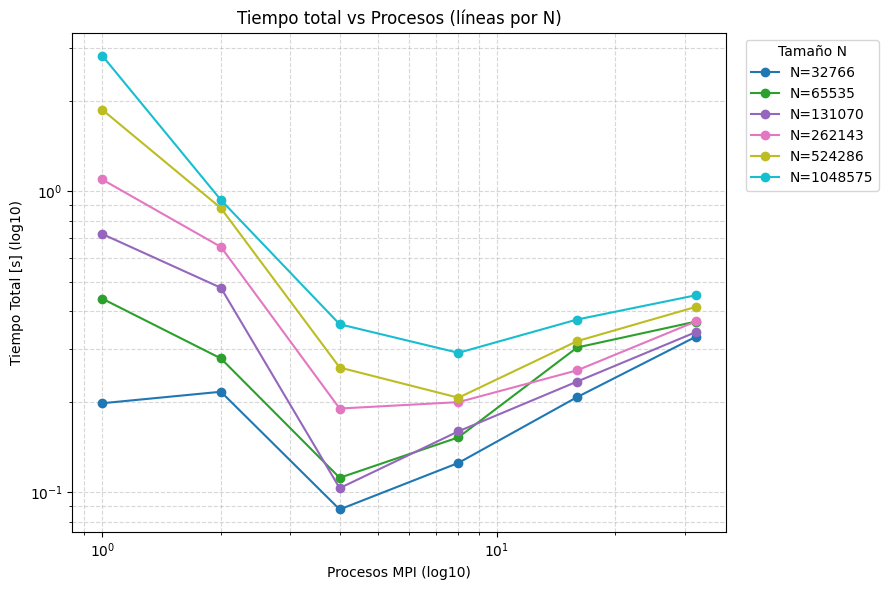

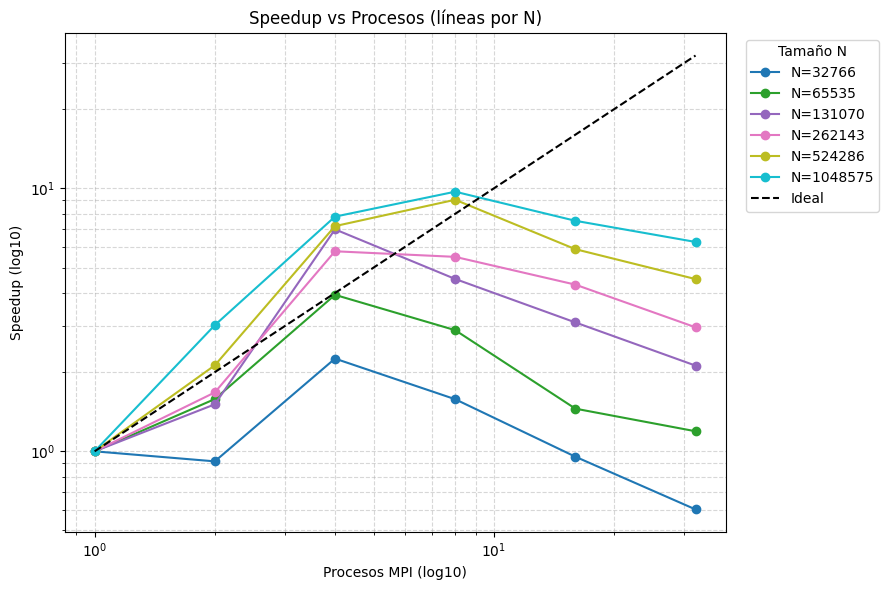

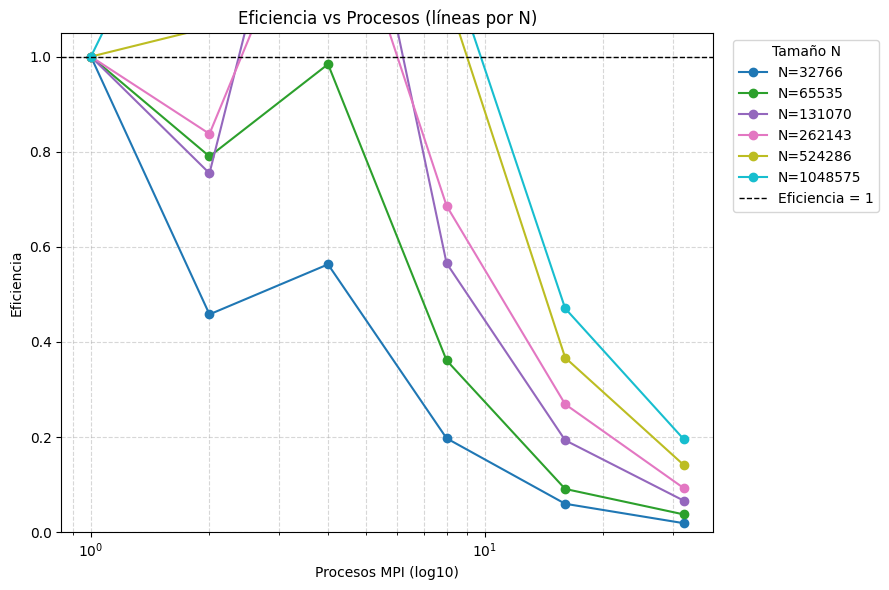

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# Filtrado de filas válidas y conversión a pandas para graficar
cols_needed = ['MPI Size','N','Tiempo Total','speedup','efficiency']
df_plot = (
    df_full_measures
    .select(cols_needed)
    .drop_nulls()
    .filter((pl.col('MPI Size') > 0) &
            (pl.col('Tiempo Total') > 0) &
            (pl.col('speedup') > 0) &
            (pl.col('efficiency') > 0))
    .sort(['N','MPI Size'])
)
pdf = df_plot.to_pandas()

if pdf.empty:
    print("No hay datos válidos para graficar.")
else:
    tamanos = sorted(pdf['N'].unique())
    cmap = cm.get_cmap('tab10', max(len(tamanos), 1))
    color_for = {n: cmap(i % 10) for i, n in enumerate(tamanos)}

    # --- 1) Tiempo total vs Procesos MPI (log-log) ---
    plt.figure(figsize=(9,6))
    for n in tamanos:
        sub = pdf[pdf['N'] == n].sort_values('MPI Size')
        if not sub.empty:
            plt.plot(sub['MPI Size'], sub['Tiempo Total'], marker='o', label=f'N={n}', color=color_for[n])
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True, which='both', ls='--', alpha=0.5)
    plt.xlabel('Procesos MPI (log10)')
    plt.ylabel('Tiempo Total [s] (log10)')
    plt.title('Tiempo total vs Procesos (líneas por N)')
    plt.legend(title='Tamaño N', bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # --- 2) Speedup vs Procesos MPI (log-log), con línea ideal ---
    plt.figure(figsize=(9,6))
    for n in tamanos:
        sub = pdf[pdf['N'] == n].sort_values('MPI Size')
        if not sub.empty:
            plt.plot(sub['MPI Size'], sub['speedup'], marker='o', label=f'N={n}', color=color_for[n])
    plt.xscale('log')
    plt.yscale('log')
    # Línea ideal: speedup = P
    xs = np.unique(pdf['MPI Size'].values)
    xs = np.sort(xs)
    if xs.size > 0:
        plt.plot(xs, xs, 'k--', label='Ideal')
    plt.grid(True, which='both', ls='--', alpha=0.5)
    plt.xlabel('Procesos MPI (log10)')
    plt.ylabel('Speedup (log10)')
    plt.title('Speedup vs Procesos (líneas por N)')
    plt.legend(title='Tamaño N', bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # --- 3) Eficiencia vs Procesos MPI (semilog-x) ---
    plt.figure(figsize=(9,6))
    for n in tamanos:
        sub = pdf[pdf['N'] == n].sort_values('MPI Size')
        if not sub.empty:
            plt.plot(sub['MPI Size'], sub['efficiency'], marker='o', label=f'N={n}', color=color_for[n])
    plt.xscale('log')  # semilog-x
    plt.ylim(0, 1.05)
    plt.axhline(1.0, color='k', linestyle='--', linewidth=1, label='Eficiencia = 1')
    plt.grid(True, which='both', ls='--', alpha=0.5)
    plt.xlabel('Procesos MPI (log10)')
    plt.ylabel('Eficiencia')
    plt.title('Eficiencia vs Procesos (líneas por N)')
    plt.legend(title='Tamaño N', bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
